## Data science project, data exploration

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

In [110]:
df1 = pd.read_csv('GPP_NEE_flux_2001-2022.csv')
df2 = pd.read_csv('voc_2010-2022.csv')
df3 = pd.read_csv('latent_heat_flux_2018-2022.csv')
df3.head()

,Unnamed: 0,Datetime,latent_heat_flux_after_4-2018,latent_heat_flux_quality_flag_after_4-2018
0,0,2018-04-01 00:00:00,-0.10731,1.0
1,1,2018-04-01 01:30:00,0.36941,1.0
2,2,2018-04-01 02:00:00,-0.51663,1.0
3,3,2018-04-01 02:30:00,0.05330,1.0
4,4,2018-04-01 03:00:00,1.07773,1.0


### Original data without any manipulatioon

<Axes: xlabel='Datetime'>

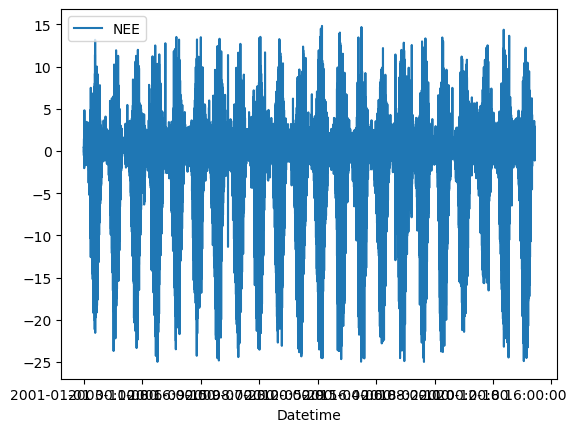

In [109]:
df1.plot('Datetime', 'NEE')

<Axes: xlabel='Datetime'>

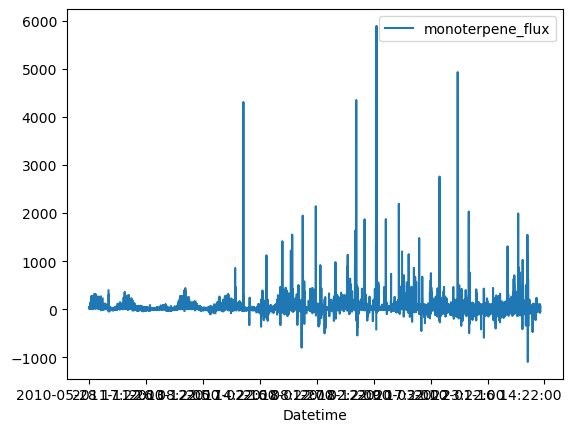

In [107]:
df2.plot('Datetime','monoterpene_flux')

<Axes: xlabel='Datetime'>

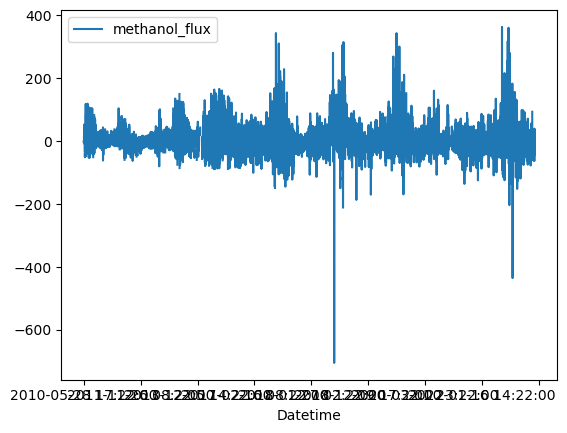

In [106]:
df2.plot('Datetime','methanol_flux')

<Axes: xlabel='Datetime'>

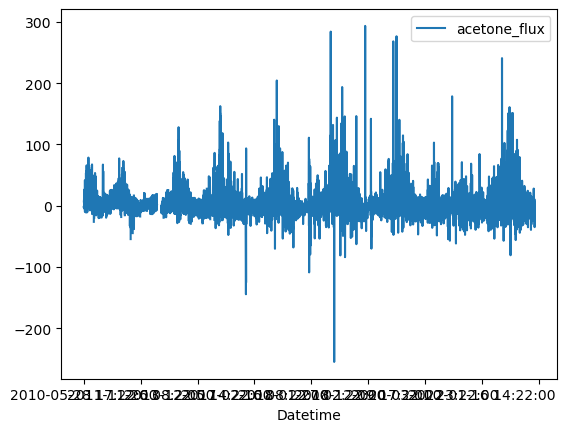

In [105]:
df2.plot('Datetime', 'acetone_flux')

<Axes: xlabel='Datetime'>

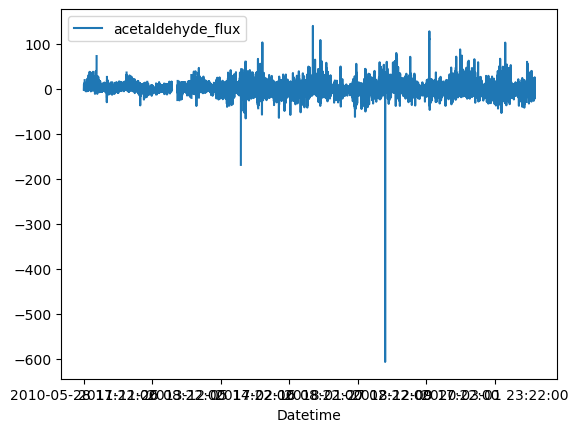

In [103]:
df2.plot('Datetime','acetaldehyde_flux')

<Axes: xlabel='Datetime'>

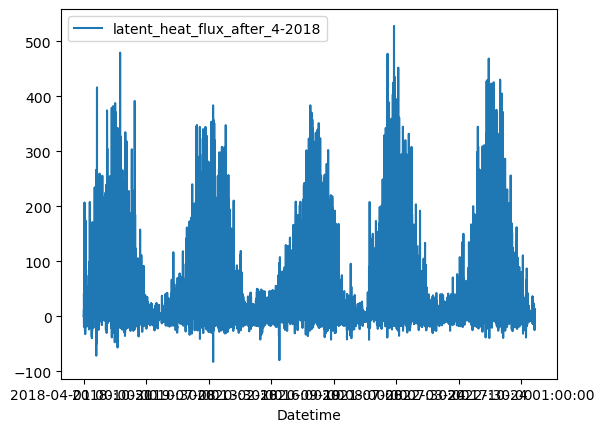

In [112]:
df3.plot('Datetime','latent_heat_flux_after_4-2018')

### Converting to datetime objects and looking at different levels of aggregated data (avg)

#### First let's look at the data avreged on monthly level

In [119]:
# converting the dates to datetime objects

from datetime import datetime

df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df3['Datetime'] = pd.to_datetime(df3['Datetime'])

In [126]:
new_df1 = df1.resample('M', on = 'Datetime').mean().reset_index()
new_df1.head()

,Datetime,Unnamed: 0,NEE,NEE_gapfilling_method,GPP
0,2001-01-31,743.5,0.500258,0.752016,0.078475
1,2001-02-28,2159.5,0.506229,0.708333,0.104264
2,2001-03-31,3575.5,0.530796,0.452285,0.235153
3,2001-04-30,5039.5,-0.229057,0.326389,1.650933
4,2001-05-31,6503.5,-1.966106,0.340054,4.672889


<Axes: xlabel='Datetime'>

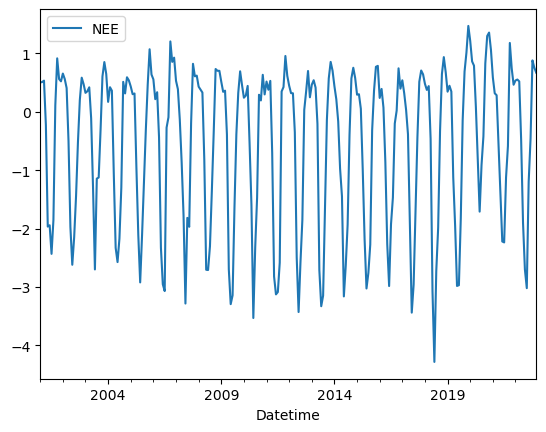

In [127]:
new_df1.plot('Datetime', 'NEE')

In [128]:
new_df2 = df2.resample('M', on = 'Datetime').mean().reset_index()
new_df2.head()

,Datetime,Unnamed: 0,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
0,2010-05-31,11.0,25.416085,12.598373,2.743635,2.008649
1,2010-06-30,79.0,73.983493,24.146687,12.054399,5.020212
2,2010-07-31,221.5,113.258477,28.117600,21.740744,9.506929
3,2010-08-31,394.0,73.210875,10.734172,9.513922,5.129237
4,2010-09-30,564.0,34.914151,1.506185,-2.420466,1.028728


<Axes: xlabel='Datetime'>

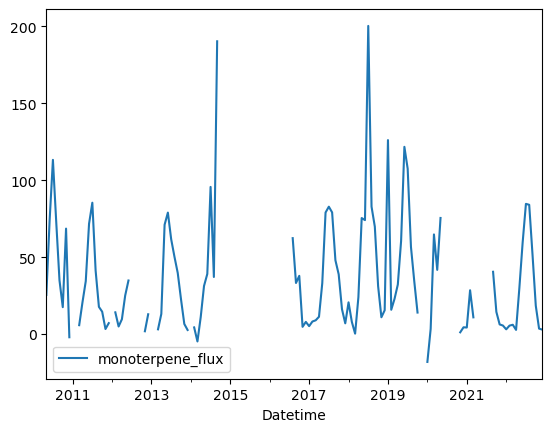

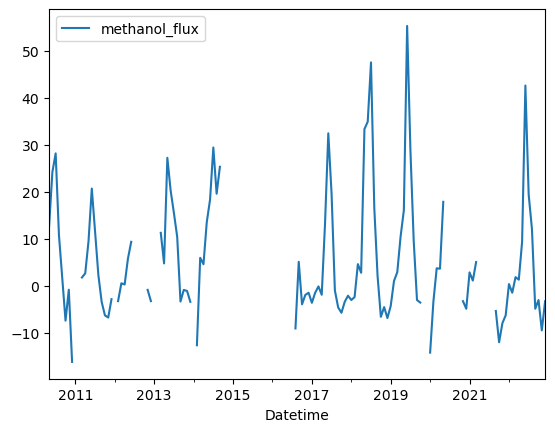

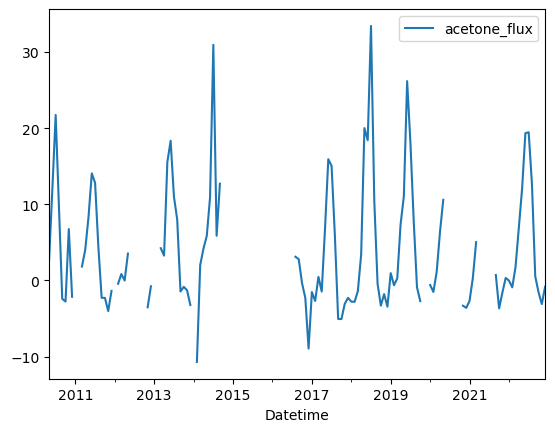

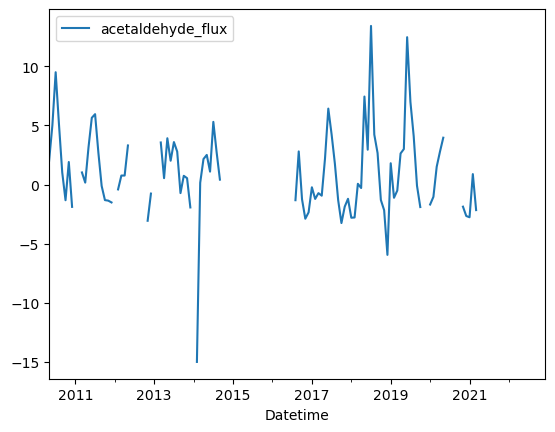

In [130]:
new_df2.plot('Datetime', 'monoterpene_flux')
new_df2.plot('Datetime', 'methanol_flux')
new_df2.plot('Datetime', 'acetone_flux')
new_df2.plot('Datetime', 'acetaldehyde_flux')

In [131]:
new_df3 = df3.resample('M', on = 'Datetime').mean().reset_index()
new_df3.head()

,Datetime,Unnamed: 0,latent_heat_flux_after_4-2018,latent_heat_flux_quality_flag_after_4-2018
0,2018-04-30,694.0,15.353727,0.493880
1,2018-05-31,2112.5,58.062228,0.241713
2,2018-06-30,3545.5,67.300773,0.184767
3,2018-07-31,4972.5,78.518449,0.282730
4,2018-08-31,6418.0,51.055049,0.358076


<Axes: xlabel='Datetime'>

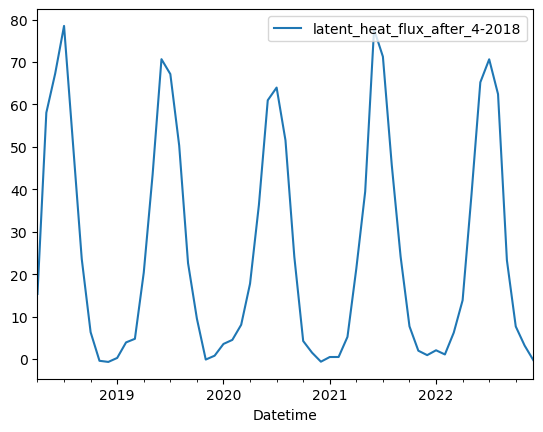

In [132]:
new_df3.plot('Datetime', 'latent_heat_flux_after_4-2018')